# Introduction
## What Is Wish?
According to a Google search, **Wish** is an online e-commerce that connects millions of customers in over 60 countries to 250,000 merchants globally.

<img src="https://www.techzilla.it/wp-content/uploads/2019/03/imageproxy-1200x402.png" width="700">

In the site we can find different categories of products such as:
* Technology (Laptops, Chargers, Hardware etc.)
* Car and House Accessories
* Clothes

## What Is This Dataset About?
In this analysis we are going to focus in the **Clothes** category. From what we can read in the description of the dataset in kaggle, the data was collected in **august 2020** by searching the word **"summer"**.





# 1. Data Cleaning

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-products-and-sales-in-ecommerce-wish/computed_insight_success_of_active_sellers.csv
/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv
/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.sorted-by-count.csv
/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.csv


In [2]:
#loading and showing head of dataset
df = pd.read_csv("/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv")
df.head(4)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.0,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08


In [3]:
df.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

There is a total of **43** columns, let's try to reduce that number.

In [4]:
df = df[['title_orig', 'price', 'retail_price',
        'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'shipping_option_price','shipping_is_express', 'countries_shipped_to',
        'has_urgency_banner','merchant_rating_count', 'merchant_rating','merchant_has_profile_picture',
        ]]



**Some considerations:**
* Excluded product color and size because it's just showing the ones that were found in getting the data : there are more colors and sizes for each product so having just one for each category doesn't say much.
* Excluded currency used, as every price is in EUR
* Excluded shipping option, the "shipping_is_express" column is enough.
* Excluded product's and merchant's id's and pictures, that won't be needed.

*Now let's look at particular values that are missing and see if we have to modify columns*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   rating_five_count             1528 non-null   float64
 8   rating_four_count             1528 non-null   float64
 9   rating_three_count            1528 non-null   float64
 10  rating_two_count              1528 non-null   float64
 11  rating_one_count              1528 non-null   float64
 12  badges_count                  1573 non-null   int64  
 13  bad

In [6]:
df.isnull().sum()

title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
has_urgency_banner              1100
merchant_rating_count              0
merchant_rating                    0
merchant_has_profile_picture       0
dtype: int64

After loading the data we se we have **1573** entries and some null values, let's see what some of them are about:
* Exactly 45 for rating counts from 1 to 5 star, could it be that there are products with no ratings at all?
* 1100 null values in the has urgency banner : the values there are 1's so the null values should be    turned into 0's

In [7]:
#rename columns
df = df.rename(columns={'has_urgency_banner': 'is_running_out',
                       'title_orig': 'title'})
#fix the running out column
df['is_running_out'] = df['is_running_out'].fillna(0)

df[df['rating_five_count'].isna()][['rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']].isna().sum()

rating_four_count     45
rating_three_count    45
rating_two_count      45
rating_one_count      45
dtype: int64

*As expected we see the null values in the rating are actually of the same 45 products*

In [8]:
df[df['rating_five_count'].isna()].sample(10)

,title,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,shipping_option_price,shipping_is_express,countries_shipped_to,is_running_out,merchant_rating_count,merchant_rating,merchant_has_profile_picture
189,Women's Active Skort Athletic Stretchy Pleated...,5.00,5,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"ladies skort,running skirt,summer skirt,Golf,s...",2,0,8,1.0,129,3.837209,0
346,2020 New Women Summer Fashion O-neck Sleevele...,8.00,7,10,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Slim Fitting,Tank,summer tank top,Tops...",3,0,10,0.0,27175,3.966035,0
904,New Ladies Fashion Print Top Summer V-neck Sle...,9.00,10,10,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"blouse,Summer,Fashion,Ladies Fashion,topsandto...",3,0,43,1.0,291,3.690722,0
1488,New Women Summer Fashion Solid Color Shorts Ca...,14.00,14,1,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Plus Size,pants,summer shorts,summersho...",4,0,27,0.0,1134,3.955908,0
1186,Women Fashion Vintage Animal Dragonfly Owl Pri...,5.00,5,100,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Fashion,dragon fly,summer t-shirts,T Sh...",1,0,35,0.0,1172,4.122867,0
1190,Women's Summer Slim-fit Print Strapless Sleeve...,9.00,9,100,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,woman fashion,printeddres,suspenderdres...",3,0,44,0.0,246312,4.203725,0
865,Butterfly Print Cotton Face Mask Outdoor Sport...,2.67,67,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"butterfly,Summer,Outdoor,isolation,Masks,Sport...",1,0,27,1.0,13,3.692308,0
1117,New Ladies Fashion Print Top Summer V-neck Sle...,9.00,10,10,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"blouse,Summer,Fashion,Ladies Fashion,topsandto...",3,0,43,0.0,291,3.690722,0
74,Fashion Women Sleeveless Lace Vest Loose V Nec...,8.00,33,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Vest,Fashion,Lace,V-neck,Women's Fashion,laceb...",2,0,25,0.0,1496,4.169786,0
864,8 Colors Plus Size Summer New Women Fashion La...,4.65,4,50,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Women Vest,Plus Size,Tops & Blouses,tunic top,...",1,0,36,1.0,268,3.891791,0


*They seem to be having a rating of 5 even with no ratings: we are going to change the rating and all the rating counts to 0*

In [9]:
#changing rating to 0
df.loc[df['rating_five_count'].isna(), 'rating'] = 0

df.loc[df['rating_five_count'].isna(), ['rating_five_count',
                                        'rating_four_count', 'rating_three_count',
                                       'rating_two_count', 'rating_one_count']] = 0
df.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'is_running_out',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture'],
      dtype='object')

**We now have a completely clean dataset and ready to explore it!**

# 2. Data Exploration

## 2.1 Successful Products 
> Let's start looking at the most successful products and show the top 10 of the most sold ones.

In [10]:
df.head()

,title,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,shipping_option_price,shipping_is_express,countries_shipped_to,is_running_out,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",4,0,34,1.0,568,4.128521,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",2,0,41,1.0,17752,3.899673,0
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",3,0,36,1.0,295,3.989831,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",2,0,41,0.0,23832,4.020435,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,0,35,1.0,14482,4.001588,0


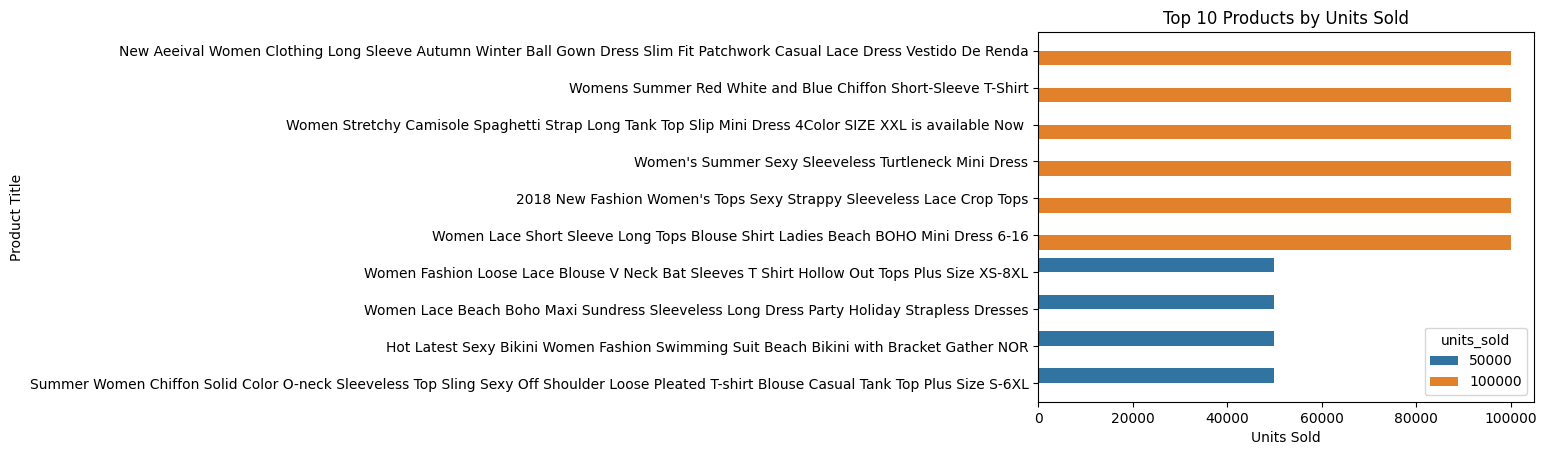

In [11]:
top_10_products = df.sort_values(by='units_sold', ascending=False).head(10)


# Create a horizontal bar plot

sns.barplot(x='units_sold', y='title', data=top_10_products, hue = 'units_sold')
plt.xlabel('Units Sold')
plt.ylabel('Product Title')
plt.title('Top 10 Products by Units Sold')
plt.show()

*We can see that:*
* Most selling products are **mini dresses** and **bikinis**
* The words **sexy** is repeated many times

> Now let's look at the number of units sold, since it's strange they are exactly 100000 or 50000

In [12]:
df['units_sold'].unique()

array([   100,  20000,   5000,     10,  50000,   1000,  10000, 100000,
           50,      1,      7,      2,      3,      8,      6])

It seems like they are all numbers approximated to their lower bound. So let's pretend they are divided in ranges like this:
* 10-100
* 100-1000
* 1000-5000
* 5000-10000
* 10000-20000
* 20000-50000
* 50000-100000
* 100000+
> Let's round the numbers below 10 to 10 and define 3 performance characteristics:
1. Average : 10-1000
2. Successful: 1000-20000
3. Very Successful 20000+

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


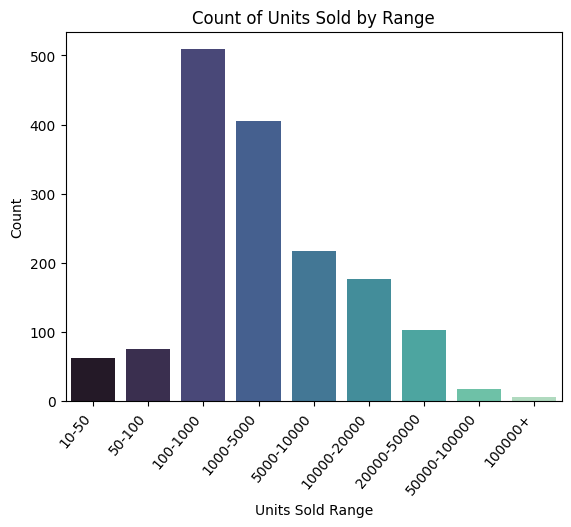

In [13]:
#round to 10
df.loc[df['units_sold'] < 10, 'units_sold'] = 10
units = np.sort(df['units_sold'].unique())

#show units sold by range

ranges = ['10-50','50-100','100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '100000+']
def find_units_count():
    units_array = []
    for x in units:
        times = df.loc[df['units_sold'] == x, 'units_sold'].count()
        units_array.append(times)
    return units_array
        
units_count = find_units_count()
units_count
        
sns.barplot(x=ranges, y=units_count, palette='mako')
plt.title('Count of Units Sold by Range')
plt.xlabel('Units Sold Range')
plt.ylabel('Count')

# Display the plot
plt.xticks(rotation=50, ha='right')
plt.show()

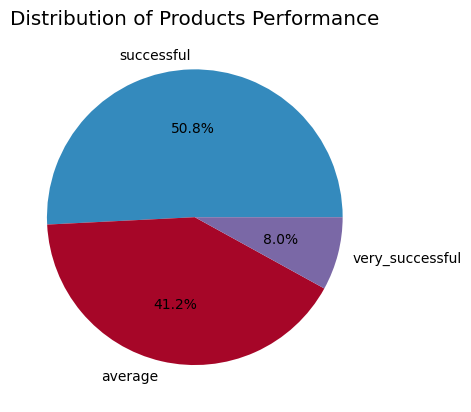

In [14]:
#average if < 1000, successful if  1000<=x<20000 ,very successful >=20000
df['performance'] = df['units_sold'].apply(lambda x: 'average' if x < 1000 
                                           else ('successful' if x < 20000 else 'very_successful'))
#pie plot
plt.style.use('bmh')
counts = df['performance'].value_counts()
plt.pie(counts, autopct='%1.1f%%', labels = counts.index)
plt.title('Distribution of Products Performance')
plt.show()

*Looking at the two plots we can see that:*
* Majority of products in the dataset are between the **100-1000** and the **1000-5000** range, but what surprises me the most is that there are more products with *5000-10000* units sold than *50-100* units sold: seems like these summer products are selling well!
* **50%** of the products are successful based on the filters i put, but is there something different between average, sucessful and very successful products?

We will try to answer the last question in the next steps.

## 2.2 Impact of Ratings on Success

> Let's look at why products are successful, starting with rating.

In [15]:
df.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'is_running_out',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'performance'],
      dtype='object')

In [16]:
df[['title','rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count']]

,title,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,3.76,54,26.0,8.0,10.0,1.0,9.0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0
2,2020 New Arrival Women Spring and Summer Beach...,3.57,14,5.0,4.0,2.0,0.0,3.0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,4.03,579,295.0,119.0,87.0,42.0,36.0
4,Women Summer Shorts Lace Up Elastic Waistband ...,3.10,20,6.0,4.0,2.0,2.0,6.0
...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,4.08,1367,722.0,293.0,185.0,77.0,90.0
1569,10 Color Women Summer Shorts Lace Up Elastic W...,3.07,28,11.0,3.0,1.0,3.0,10.0
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,3.71,59,24.0,15.0,8.0,3.0,9.0
1571,Fashion Women Summer Sleeveless Dresses V Neck...,2.50,2,0.0,1.0,0.0,0.0,1.0


> Looking at the rating columns i notice two things:
1. Some products have a rating count that's too low to be considered, let's only look at products with more than 150 ratings to try to have a fair result
2. The rating of the products is a decimal number: let's create another column that categorizes each product into it's rating range.

In [17]:
df_ratings = df[df['rating_count'] > 100]
df_ratings = df_ratings[['title','price', 'retail_price', 'units_sold','rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count','performance']]
df_ratings['rating_count'].count()

876

> We have 876 products so that's a good amount to work with

In [18]:
df_ratings['rating_range'] = df_ratings['rating'].apply(lambda x: '< 1' if x < 1 
                                           else '1-2' if x < 2 
                                           else '2-3' if x < 3
                                           else '3-4' if x < 4
                                           else '4-5')
df_ratings['rating_range'].value_counts()

rating_range
3-4    536
4-5    331
2-3      9
Name: count, dtype: int64

> We see something strange, there are only 13 products in the 2-3 range and nothing below that range when we filter for more than 100 ratings.Let's just display the 3-4 and 4-5 ranges results.

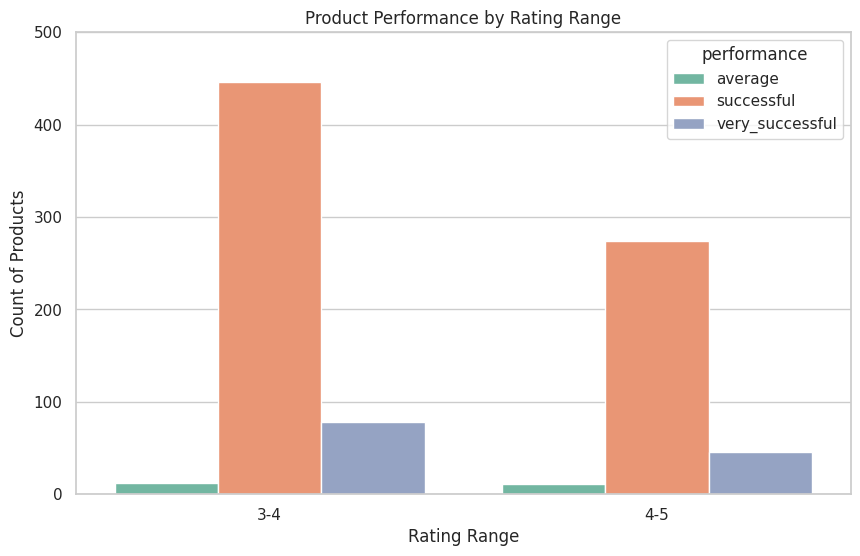

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
df_grouped = df_ratings.groupby(['rating_range', 'performance']).size().reset_index(name='counts')
df_grouped = df_grouped[df_grouped['rating_range'] != '2-3']
# Plot the data with hue based on 'performance'
sns.barplot(x='rating_range', y='counts', hue='performance', data=df_grouped, palette='Set2')
plt.ylim(0, 500)
# Add labels and title
plt.xlabel('Rating Range')
plt.ylabel('Count of Products')
plt.title('Product Performance by Rating Range')

# Show the plot
plt.show()

**Even though the 2-3 range and below don't give us much information, we see that with over 100 reviews the products with 3+ rating have a really good chance to be successful, being that it gives faith to the customer that they will probably like the product if other people already did.**

## 2.3 Impact of Merchant Reputation

> Now let's look at data about the merchants

In [20]:
df.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'is_running_out',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'performance'],
      dtype='object')

In [21]:
df.head(3)

,title,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,shipping_option_price,shipping_is_express,countries_shipped_to,is_running_out,merchant_rating_count,merchant_rating,merchant_has_profile_picture,performance
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",4,0,34,1.0,568,4.128521,0,average
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",2,0,41,1.0,17752,3.899673,0,very_successful
2,2020 New Arrival Women Spring and Summer Beach...,8.0,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",3,0,36,1.0,295,3.989831,0,average


*columns that are important are : merchant_rating_count, merchant_rating and merchant_has_profile picture*

*let's see how much they affect performance*

In [22]:
average_ratings = df.groupby('performance')['merchant_rating_count'].mean()
average_ratings

performance
average            13630.348765
successful         28667.486859
very_successful    78890.134921
Name: merchant_rating_count, dtype: float64

/tmp/ipykernel_33/3084226942.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('summer', len(average_ratings))


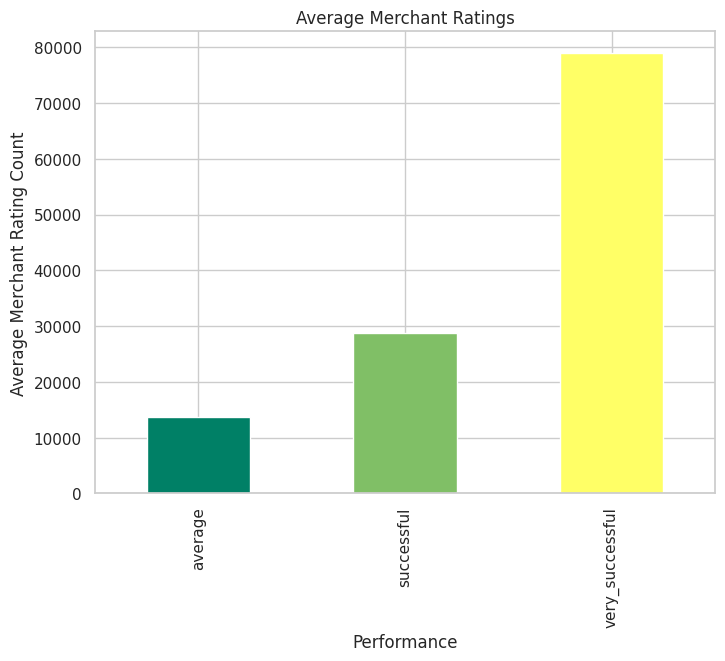

In [23]:
import matplotlib.cm as cm
cmap = cm.get_cmap('summer', len(average_ratings))
colors = cmap(np.linspace(0, 1, len(average_ratings)))

average_ratings.plot(kind='bar', color = colors, figsize=(8, 6))

plt.title('Average Merchant Ratings')
plt.xlabel('Performance')
plt.ylabel('Average Merchant Rating Count')
plt.show()

*As expected wee see that merchants with higher rating count have the best performance*

In [24]:
df['merchant_rating'].min()

2.333333333333333

In [25]:
df['merchant_rating_range'] = df['merchant_rating'].apply(lambda x: '0-1' if x < 1 
                                           else '1-2' if x < 2 
                                           else '2-3' if x < 3
                                           else '3-4' if x < 4
                                           else '4-5')
df['merchant_rating_range'].value_counts()

merchant_rating_range
4-5    931
3-4    640
2-3      2
Name: count, dtype: int64

*Again we see just 2 products in the 2-3 rating while the others are much higher.Let's display the results*

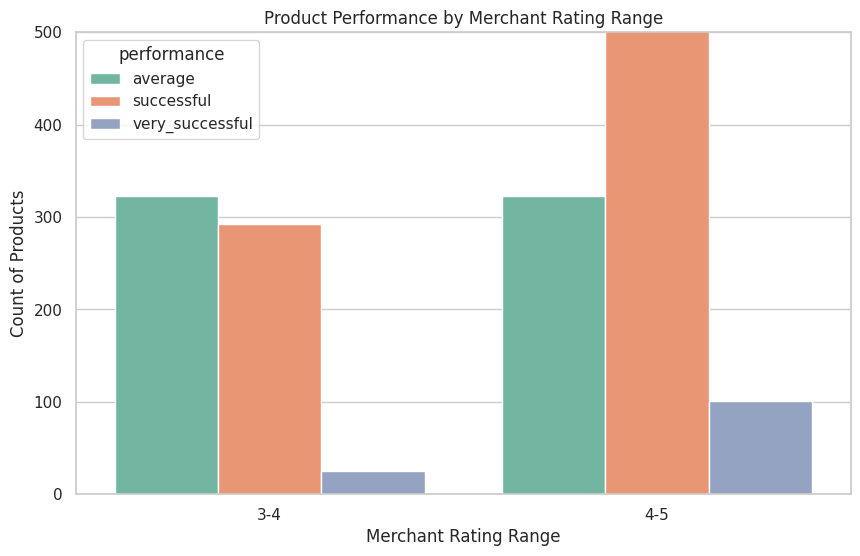

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
df_grouped = df.groupby(['merchant_rating_range', 'performance']).size().reset_index(name='counts')
df_grouped = df_grouped[df_grouped['merchant_rating_range'] != '2-3']
sns.barplot(x='merchant_rating_range', y='counts', hue='performance', data=df_grouped, palette='Set2')
plt.ylim(0, 500)

plt.xlabel('Merchant Rating Range')
plt.ylabel('Count of Products')
plt.title('Product Performance by Merchant Rating Range')

# Show the plot
plt.show()

> Unlike the Rating of single products, here we see that having higher merchant rating has significantly more importance on having successful and very successful products.

> Lastly, let's check if having a profile picture somewhat helps with performance

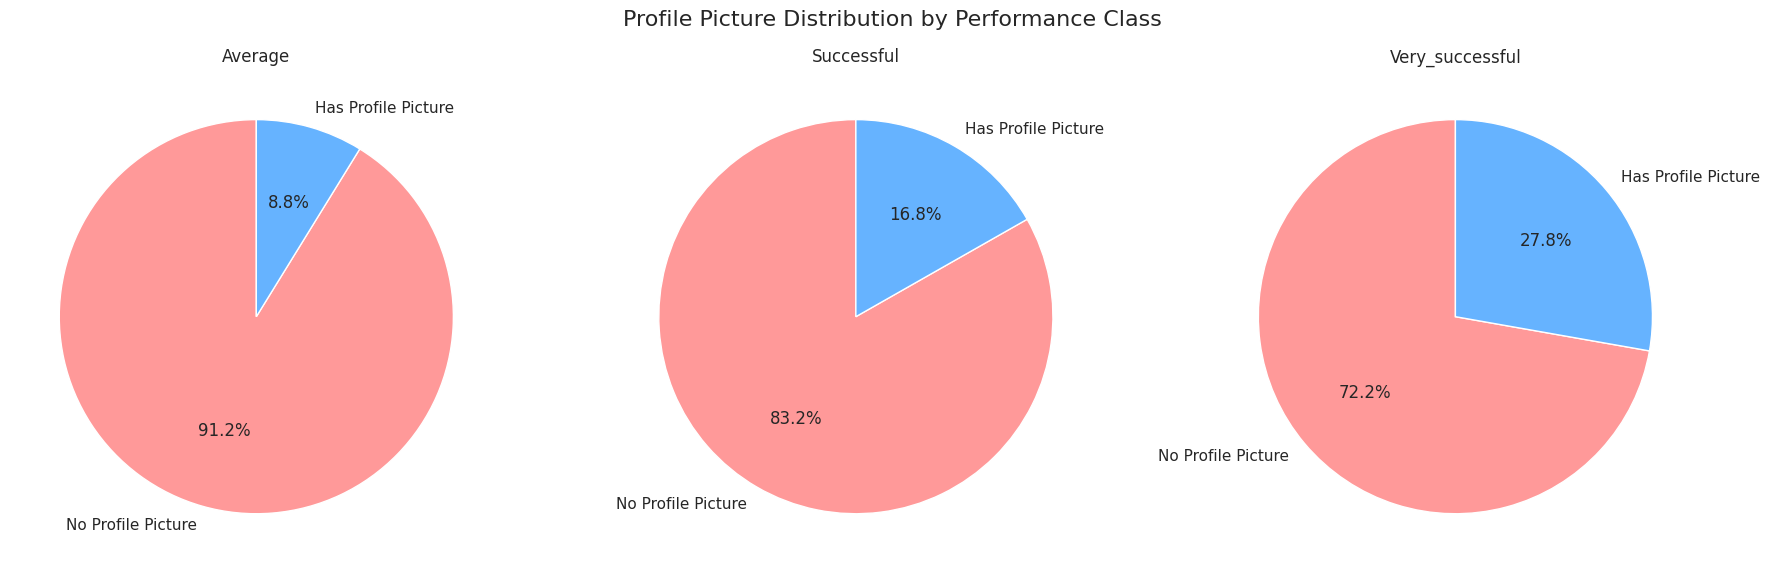

In [27]:
# Group by performance and has_profile_picture
pfp = df.groupby(['performance', 'merchant_has_profile_picture']).size().unstack(fill_value=0)

# Create subplots for pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

performance_classes = pfp.index  # Unique performance classes
for i, performance in enumerate(performance_classes):
    values = pfp.loc[performance]
    labels = ['No Profile Picture', 'Has Profile Picture']
    colors = ['#ff9999', '#66b3ff']  # Custom colors for the pie charts
    
    # Create pie chart
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'{performance.capitalize()}')

# Add a main title
plt.suptitle('Profile Picture Distribution by Performance Class', fontsize=16)
plt.tight_layout()
plt.show()


> We can see that the more successful the product is, the more having a profile picture matters, but I wouldn't consider it an high priority factor in achieving success, but it's still something that could help with having the customer's faith

## 2.4 Impact of Badges, Banners, and Shipping Options

> Lastly, let's look at the little things such as badges, banners and shipping options that could help in having a successful product

> This time, we will look at influence looking at a correlation matrix

<Axes: >

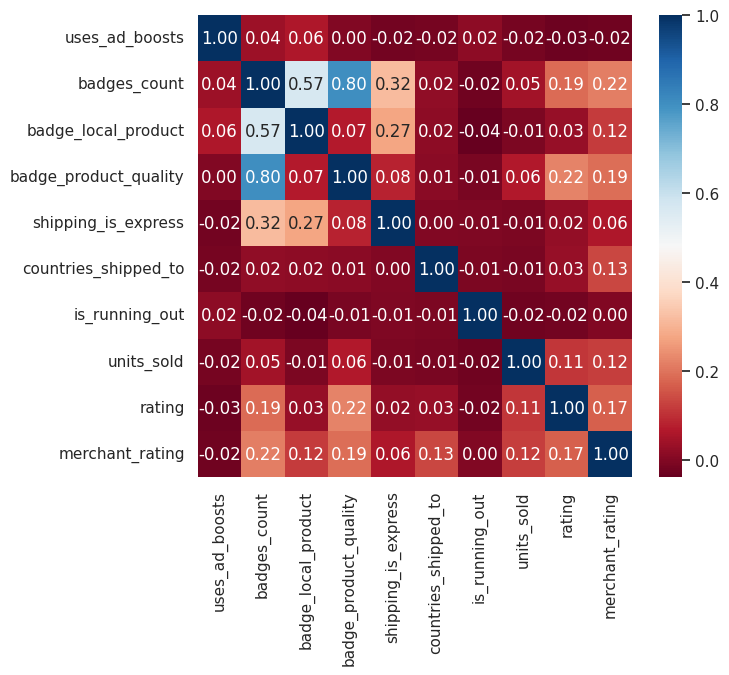

In [28]:

df_badges = df[['uses_ad_boosts','badges_count', 'badge_local_product', 'badge_product_quality',
                'shipping_is_express', 'countries_shipped_to','is_running_out',
                'units_sold','rating','merchant_rating']]
corr = df_badges.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(corr, cmap ="RdBu",annot = True,fmt=".2f")

**Conclusions from the heatmap:**
* **Increasing Units Sold:** We see a weak positive correlation with rating and merchant rating, meaning improving customer reviews can boost sales.
* **Improve Rating:** Rating seems to be affected most by product quality badges, so it is important to use qualitative material to get that; furthermore we see merchant rating is affected more than rating by *local product badge*,meaning it's  important to showcase the materials used for the product come from local suppliers and the *numbers of countries product is shipped to*,so if having a low merchant rating that's what you should focus on improving.

# 3. Predicting Product Performance

 Using the information we got from our data exploration, let's use the data i considered most impactful 
 on performance
 to train a **Logistic Regression** model on predicting product performance between
 1 : Average, 2: Successful, 3: Very Successful

In [29]:
#Dividing performance in categories 1 = Average | 2 = Successful | 3 = Very Successful
df['performance'] = df['performance'].apply(
    lambda x: 1 if x == 'average' else 2 if x == 'successful' else 3
)
df['performance'] = df['performance'].astype('int64')
df_reg = df[['price', 'retail_price','rating', 
             'rating_count', 'badge_local_product', 'badge_product_quality',
            'shipping_is_express','countries_shipped_to',
             'merchant_rating_count', 'merchant_rating','merchant_has_profile_picture','performance']]



In [30]:
df_reg.describe()

,price,retail_price,rating,rating_count,badge_local_product,badge_product_quality,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture,performance
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000,1573.000000,1573.000000
mean,8.325372,23.288620,3.677858,889.659250,0.018436,0.074380,0.002543,40.456453,2.649583e+04,4.032345,0.143675,1.668150
std,3.932030,30.357863,0.789466,1983.928834,0.134565,0.262472,0.050379,20.301203,7.847446e+04,0.204768,0.350871,0.618201
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000e+00,2.333333,0.000000,1.000000
25%,5.810000,7.000000,3.500000,24.000000,0.000000,0.000000,0.000000,31.000000,1.987000e+03,3.917353,0.000000,1.000000
50%,8.000000,10.000000,3.810000,150.000000,0.000000,0.000000,0.000000,40.000000,7.936000e+03,4.040650,0.000000,2.000000
75%,11.000000,26.000000,4.080000,855.000000,0.000000,0.000000,0.000000,43.000000,2.456400e+04,4.161797,0.000000,2.000000
max,49.000000,252.000000,5.000000,20744.000000,1.000000,1.000000,1.000000,140.000000,2.174765e+06,5.000000,1.000000,3.000000


Here i import the libraries needed to create the model doing two things: 
* Using a test size of 30% because I feel like the data we have isn't a lot and I don't want my model to overfit;
* Using a scaler because we have big data like **rating count** and small boolean-like data such as **shipping_is_express**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

#pick features and target values
features = df_reg.drop(columns = 'performance')
target = df_reg['performance']
#split dataset in training and test
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.3,
    random_state = 42
)
#in the dataset we're using there are values that are really high(such as rating_count) and values
# that are really small(such has shipping_is_express) so let's use a scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # only transform because model doesn't want to know mean/std


After doing that, let's try and find the best parameters to put in our model. Again doing two things:
* Using **GridSearchCV** library to choose between the best C parameter (regularization parameter);
* Doing this with cross validation across 5 folds to see if the model consistently predicts well and doesn't overfit

In [32]:
#Create model and use gridsearchcv to find the better C parameter(regularization parameter)
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 50,100]}

grid_search = GridSearchCV(LogisticRegression(random_state=0, max_iter=500), 
                           param_grid, 
                           cv=5, #5 fold cross validation to check for consistency
                           scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameter: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

Best Parameter: {'C': 100}
Best CV Score: 0.9255



**We get really high accuracy, so let's check the results with test results**

In [33]:
#get the model
model = LogisticRegression(random_state=0, 
                           max_iter=500, 
                           C = 100)
model.fit(X_train_scaled,y_train)

#calculate prediction results
print(f"Train Results : {model.score(X_train_scaled,y_train):.4f}\n"
      f"Test Results: {model.score(X_test_scaled,y_test):.4f}")

Train Results : 0.9273
Test Results: 0.9068


**We get an amazing result of 90% accuracy on the test data, let's finish by showing the Confusion Matrix, a table that measures performance of the model showing the values predicted and comparing them to the actual values**

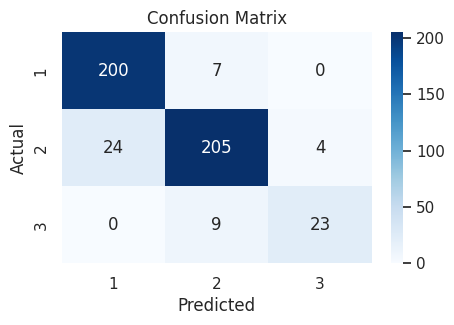

In [34]:
#get the predictions in y_pred
y_pred = model.predict(X_test_scaled)

#See results via the confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g',
           xticklabels = [1,2,3],
           yticklabels = [1,2,3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Looking at the Confusion Matrix we see our model is really good distinguishing between categories 1 and 3, but struggles slightly to predict category 2 correctly, likely because it's the one in the middle**

# Conclusions

* ***Rating*** : It has a good impact on units sold but isn't fundamental, to improve it it's important to have **good quality** products to impress customers.
* ***Merchant Rating*** : It's the one that affects units sold the most, in 2.3 we saw how having ratings between 4 and 5 and much better results in performance than it being in the 3-4 range. At the end of 2.4 we discovered the factors that improve it the most are the **number of countries** the products are shipped at and the fact that the product is made using **local supplies** , so these are what you should be looking for to have an higher merchant rating.
* ***Units sold*** : to summarize, having high ratings and a big number of reviews impacts units sold a lot, but if you want a very successful product, it's key to take care of even smaller things, like using local supplies and qualitative materials to make the products.